In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Fish.csv')
# df.head()

In [7]:
perch_df = df.loc[df['Species'] == 'Perch']
# perch_df.head()

In [8]:
perch_full = perch_df[  ['Length2', 'Height', 'Width']  ]
perch_weight = perch_df[  ['Weight']  ]

In [11]:
perch_weight.head()

,Weight
72,5.9
73,32.0
74,40.0
75,51.5
76,70.0


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
train_input, test_input, train_target, test_target =\
train_test_split(perch_full, perch_weight, random_state=42)

In [17]:
train_input.head()

,Length2,Height,Width
80,19.6,5.1376,3.0368
89,22.0,5.8750,3.5250
78,18.7,5.1992,3.1234
76,17.4,4.5880,2.9415
113,36.0,10.6091,6.7408


In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[3, 5]])
poly.transform([[3, 5]])

array([[ 3.,  5.,  9., 15., 25.]])

In [29]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
# train_poly.shape
train_poly[:5]

array([[  19.6       ,    5.1376    ,    3.0368    ,  384.16      ,
         100.69696   ,   59.52128   ,   26.39493376,   15.60186368,
           9.22215424],
       [  22.        ,    5.875     ,    3.525     ,  484.        ,
         129.25      ,   77.55      ,   34.515625  ,   20.709375  ,
          12.425625  ],
       [  18.7       ,    5.1992    ,    3.1234    ,  349.69      ,
          97.22504   ,   58.40758   ,   27.03168064,   16.23918128,
           9.75562756],
       [  17.4       ,    4.588     ,    2.9415    ,  302.76      ,
          79.8312    ,   51.1821    ,   21.049744  ,   13.495602  ,
           8.65242225],
       [  36.        ,   10.6091    ,    6.7408    , 1296.        ,
         381.9276    ,  242.6688    ,  112.55300281,   71.51382128,
          45.43838464]])

In [31]:
poly.get_feature_names_out()

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [33]:
test_poly = poly.transform(test_input)

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903557670312703

In [38]:
lr.score(test_poly, test_target)

0.971237620746181

In [39]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [44]:
poly.get_feature_names_out()

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2',
       'Length2^3', 'Length2^2 Height', 'Length2^2 Width',
       'Length2 Height^2', 'Length2 Height Width', 'Length2 Width^2',
       'Height^3', 'Height^2 Width', 'Height Width^2', 'Width^3',
       'Length2^4', 'Length2^3 Height', 'Length2^3 Width',
       'Length2^2 Height^2', 'Length2^2 Height Width',
       'Length2^2 Width^2', 'Length2 Height^3', 'Length2 Height^2 Width',
       'Length2 Height Width^2', 'Length2 Width^3', 'Height^4',
       'Height^3 Width', 'Height^2 Width^2', 'Height Width^3', 'Width^4',
       'Length2^5', 'Length2^4 Height', 'Length2^4 Width',
       'Length2^3 Height^2', 'Length2^3 Height Width',
       'Length2^3 Width^2', 'Length2^2 Height^3',
       'Length2^2 Height^2 Width', 'Length2^2 Height Width^2',
       'Length2^2 Width^3', 'Length2 Height^4', 'Length2 Height^3 Width',
       'Length2 Height^2 Width^2', 'Length2 Hei

In [42]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999994075

In [45]:
lr.score(test_poly, test_target)

-129.88033371789092

In [47]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# train_scaled[:5]

- 릿지 : 계수를 제곱한 값을 기준으로 규제
    - L2 norm : 모든계수를 작게 만들지만 0은 되지 않음
- 라쏘 : 계수의 절댓값을 기준으로 규제
    - L1 norm : 불필요한 특성의 가중치를 0으로 만듬

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896217956447125

In [55]:
ridge.score(test_scaled, test_target)

0.9788853860988026

In [70]:
import matplotlib.pyplot as plt

In [71]:
train_score = []
test_score = []

In [72]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)

    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [73]:
print(train_score, test_score)

[0.9930679875694741, 0.9918120087949357, 0.9904048455941407, 0.9896217956447125, 0.9887366307205133, 0.9841994538470815] [0.9560293715548911, 0.9796497117196328, 0.9826465162736704, 0.9788853860988026, 0.9722857046398284, 0.9624191421271446]


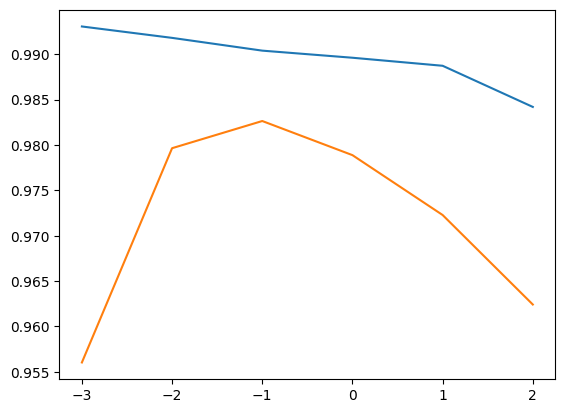

In [75]:
import numpy as np
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [78]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

ridge.score(train_scaled, train_target)
ridge.score(test_scaled, test_target)

0.9826465162736704

In [79]:
from sklearn.linear_model import Lasso

In [81]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

lasso.score(train_scaled, train_target)

0.9898014198970121

In [83]:
lasso.score(test_scaled, test_target)

0.9798798667260246

In [84]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 95.7685471 , 11.46652141,
        0.        , 10.59590887,  0.        , 31.43846725,  0.        ,
       22.04978402,  0.        , 29.29490849,  0.        ,  0.        ,
       18.62846362,  0.        ,  0.        , 41.66512381,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        5.98289456,  0.        ,  0.        ,  0.        , 20.52247113,
        0.        ,  0.        ,  0.        ,  9.14669521,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 35.34452564,
        0.        ,  0.        ,  0.        ,  0.        , 21.08199235,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])